In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy.stats as stats
import gc

gc.enable()
sns.set(font_scale=1.5)
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 130)

In [2]:
# Função para calcular effect size em populações de tamanhos e variâncias distintos
def g_effect_size(nc, nt, meanc, meant, stdc, stdt):
    num = (nc - 1)*stdc**2 + (nt - 1)*stdt**2
    den = nc + nt - 2
    stdpooled = np.sqrt(num/den)
    g = round((meant - meanc)/stdpooled, 2)

    return g

In [3]:
df = pd.read_csv('data/sia_total.csv', low_memory=False)
print('Tamanho do dataset geral: {}'.format(len(df)))
df.loc[df['AP_CIDPRI']=='C18-C21- Câncer de cólon e reto', 'AP_CIDPRI'] = 'Cólon e reto'
df.loc[df['AP_CIDPRI']=='C33-C34- Câncer de traqueia, brônquio e pulmão', 'AP_CIDPRI'] = 'Traquéia, brônquio e pulmão'
df.loc[df['AP_CIDPRI']=='C50- Câncer de Mama', 'AP_CIDPRI'] = 'Mama'
df.loc[df['AP_CIDPRI']=='C61- Câncer de Próstata', 'AP_CIDPRI'] = 'Próstata'
df.loc[df['AP_CIDPRI']=='C81- Linfoma de Hodgkin', 'AP_CIDPRI'] = 'Linfoma de Hodgkin'
df.loc[df['AP_CIDPRI']=='C82-C85;C96- Linfoma não Hodgkin', 'AP_CIDPRI'] = 'Linfoma não-Hodgkin'

df.head()

Tamanho do dataset geral: 5754880


,AP_AUTORIZ,AP_TPAPAC,AP_MVM,AP_CNSPCN,AP_CMP,AP_CIDPRI,diagn_precoce,demora_1_atd,AQ_ESTADI,AQ_DTIDEN,AQ_DTINTR,AP_VL_AP,AP_OBITO,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_CEPPCN,AP_MUNPCN,munic_resid,AP_UFDIF,AP_MNDIF,AP_CODUNI,AP_PRIPAL,AP_UFMUN,munic_estabel
0,1215200137393,1,201507,|{{|{{{{{{,2015-07-01,"Traquéia, brônquio e pulmão",False,13.000000,3.0,2015-06-26,2015-07-09,1100.0,1,80,M,3,69900970,120040,AC - Rio Branco,0,1.0,2001586,304020222,120040,AC - Rio Branco
1,3514225060632,1,201406,|{{|{|~{{{~,2014-06-01,Cólon e reto,True,319.142857,2.0,2014-03-27,2014-06-25,2224.0,0,74,M,1,16290000,350770,SP - Braúna,0,1.0,2090236,304050024,350550,SP - Barretos
2,3514225060632,2,201407,|{{|{|~{{{~,2014-07-01,Cólon e reto,True,319.142857,2.0,2014-03-27,2014-06-25,2224.0,0,74,M,1,16290000,350770,SP - Braúna,0,1.0,2090236,304050024,350550,SP - Barretos
3,3514225060632,2,201408,|{{|{|~{{{~,2014-08-01,Cólon e reto,True,319.142857,2.0,2014-03-27,2014-06-25,2224.0,0,74,M,1,16290000,350770,SP - Braúna,0,1.0,2090236,304050024,350550,SP - Barretos
4,3514234374442,1,201409,|{{|{|~{{{~,2014-09-01,Cólon e reto,True,319.142857,2.0,2014-03-27,2014-06-25,2224.0,0,74,M,1,16290000,350770,SP - Braúna,0,1.0,2090236,304050024,350550,SP - Barretos


## Custos diagnóstico precoce vs tardio

In [10]:
df.loc[df['diagn_precoce']==True][['AP_MVM','AP_AUTORIZ', 'AP_TPAPAC', 'AP_CNSPCN', 'AP_VL_AP']].head(30)

,AP_MVM,AP_AUTORIZ,AP_TPAPAC,AP_CNSPCN,AP_VL_AP
1,201406,3514225060632,1,|{{|{|~{{{~,2224.0
2,201407,3514225060632,2,|{{|{|~{{{~,2224.0
3,201408,3514225060632,2,|{{|{|~{{{~,2224.0
4,201409,3514234374442,1,|{{|{|~{{{~,2224.0
5,201410,3514234374442,2,|{{|{|~{{{~,2224.0
6,201411,3514234374442,2,|{{|{|~{{{~,2224.0
7,201412,3514250163083,1,|{{|{|~{{{~,2224.0
8,201501,3514250163083,2,|{{|{|~{{{~,2224.0
9,201502,3514250163083,2,|{{|{|~{{{~,0.0
10,201512,3515253731495,1,|{{|{|~{{{~,2224.0


In [56]:
# Custos acumulados com apacs por paciente (cujo diagnóstico foi precoce ou tardio)
df5 = df.groupby(['diagn_precoce', 'AP_CNSPCN'])['AP_VL_AP'].sum()\
        .reset_index()\
        .rename(columns={'AP_CNSPCN': 'paciente', 'AP_VL_AP': 'valor_total_gasto'})

df5.head()

,diagn_precoce,paciente,valor_total_gasto
0,False,|{{|{{{{{{,1100.0
1,False,|{{|{||{{{,11120.0
2,False,|{{|{{{{|,1487.4
3,False,|{{|{~{{{{{{,15568.0
4,False,|{{|{~{{{,904.5


In [80]:
#Monta grupos de tardio e precoce e calcula estatísticas descritivas de cada um
tardio = df5.loc[df5['diagn_precoce']==False]['valor_total_gasto']
statst = tardio.describe()
nt = round(statst[0], 2)
meant = round(statst[1], 2)
stdt = round(statst[2], 2)

precoce = df5.loc[df5['diagn_precoce']==True]['valor_total_gasto']
statsc = precoce.describe()
nc = round(statsc[0], 2)
meanc = round(statsc[1], 2)
stdc = round(statsc[2], 2)

In [81]:
#Calcula p-valor
tstatistic1, pvalue1 = stats.mannwhitneyu(precoce, tardio)
if(round(pvalue1, 2) <= 0.05):
    flag1 = 'significativo'
else: flag1 = '-'
    
tstatistic2, pvalue2 = stats.ttest_ind(precoce, tardio)
if(round(pvalue2, 2) <= 0.05):
    flag2 = 'significativo'
else: flag2 = '-'
    
#Calcula Effect Size de Hedge
g = g_effect_size(nc, nt, meanc, meant, stdc, stdt)

print('COMPARAÇÃO DE CUSTOS/PACIENTE')
print('- PRECOCE: n_pacientes = {} | mean = {}, std = {}'.format(nc, meanc, stdc))
print('- TARDIO: n_pacientes = {} | mean = {}, std = {}'.format(nt, meant, stdt))
print('- Test de Mann-Whitney: p-valor = {} ({})'.format(round(pvalue1, 5), flag1))
print('- T-test: p-valor = {} ({})'.format(round(pvalue2, 5), flag2))
print('- Effect size: {}'.format(g))

COMPARAÇÃO DE CUSTOS/PACIENTE
- PRECOCE: n_pacientes = 178451.0 | mean = 5742.99, std = 6779.11
- TARDIO: n_pacientes = 248047.0 | mean = 8798.33, std = 9855.22
- Test de Mann-Whitney: p-valor = 0.0 (significativo)
- T-test: p-valor = 0.0 (significativo)
- Effect size: 0.35


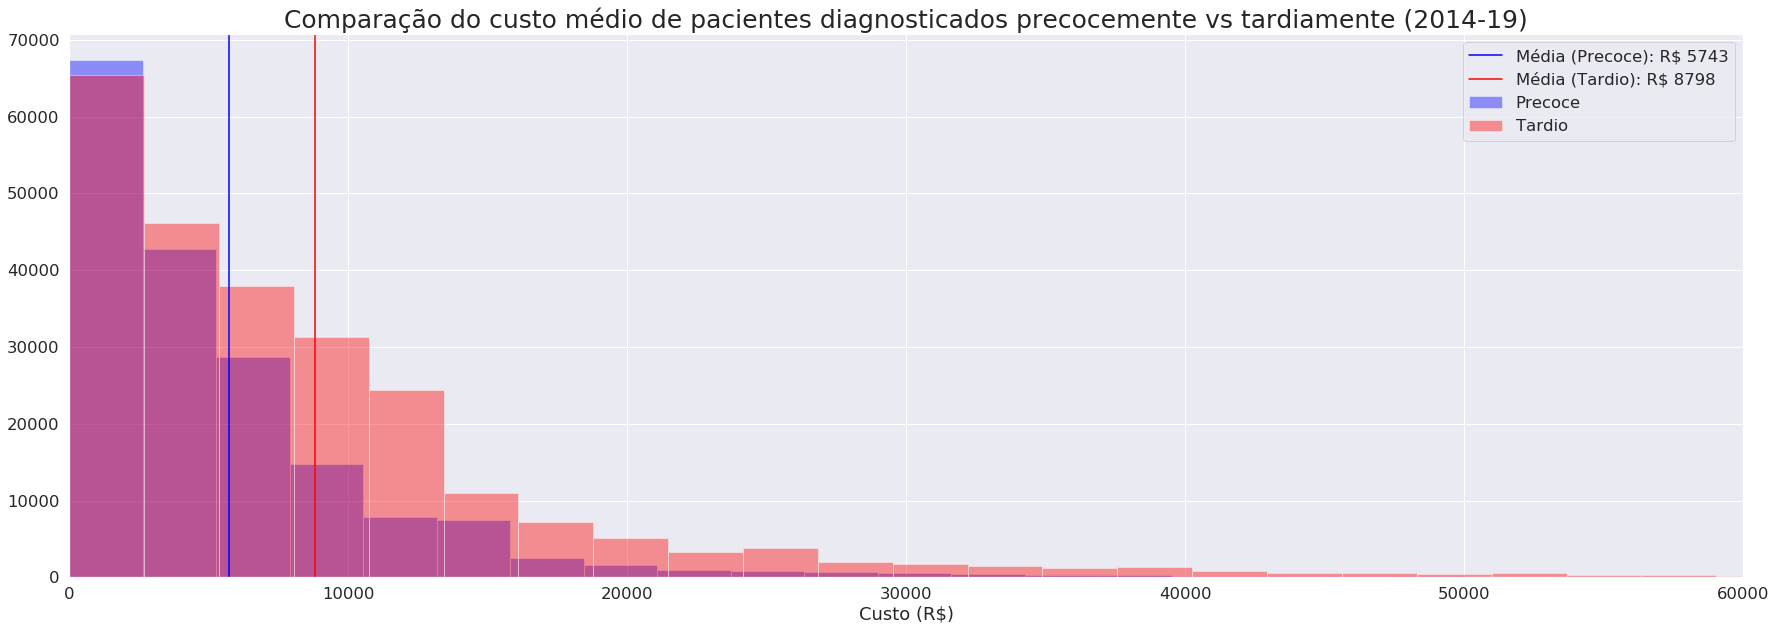

In [87]:
sns.set(font_scale=1.5)

plt.figure(figsize=(30, 10))
plt.title('Comparação do custo médio de pacientes diagnosticados precocemente vs tardiamente (2014-19)', size=25)

sns.distplot(precoce, color='blue', bins=50, norm_hist=False, kde=False, label='Precoce')
plt.axvline(x=meanc, color='blue', label='Média (Precoce): R$ {0:.0f}'.format(meanc))

sns.distplot(tardio, color='red', bins=50, norm_hist=False, kde=False, label='Tardio')
plt.axvline(x=meant, color='red', label='Média (Tardio): R$ {0:.0f}'.format(meant))
plt.xlim(0, 60000)

plt.xlabel('Custo (R$)')
plt.legend()
plt.show()

# Qual a diferença entre os tipos de câncer? 

In [8]:
df2 = df[['AP_CIDPRI', 'AP_CNSPCN', 'diagn_precoce']].groupby(['AP_CIDPRI', 'diagn_precoce'])['AP_CNSPCN'].nunique().reset_index()
df2.loc[df2['diagn_precoce']==True, 'diagn_precoce'] = 'Precoce'
df2.loc[df2['diagn_precoce']==False, 'diagn_precoce'] = 'Tardio'

df2

,AP_CIDPRI,diagn_precoce,AP_CNSPCN
0,Cólon e reto,Tardio,56822
1,Cólon e reto,Precoce,22471
2,Linfoma de Hodgkin,Tardio,3755
3,Linfoma de Hodgkin,Precoce,5586
4,Linfoma não-Hodgkin,Tardio,12327
5,Linfoma não-Hodgkin,Precoce,13493
6,Mama,Tardio,87605
7,Mama,Precoce,96904
8,Próstata,Tardio,54231
9,Próstata,Precoce,35869


In [ ]:
'''
Percentuais (tardio/total):
    Cólon e reto: 72%
    Linfoma de Hodgkin: 40%
    Linfoma de não-Hodgkin: 48%
    Mama: 47%
    Próstata: 60%
    Traquéia, brônquio e pulmão: 88%
'''

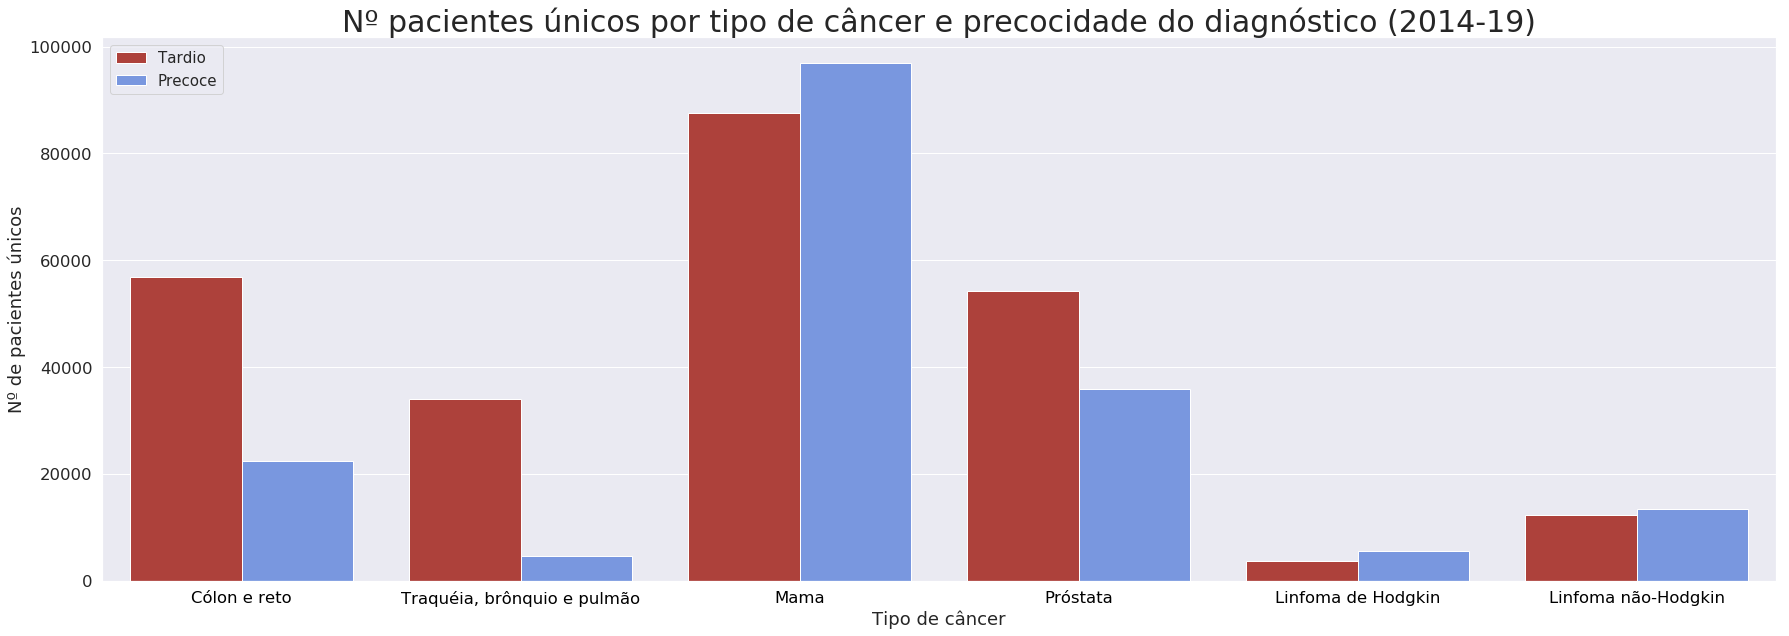

In [26]:
plt.figure(figsize=(30, 10))
plt.title('Nº pacientes únicos por tipo de câncer e precocidade do diagnóstico (2014-19)', size=30)
plt.xticks(color='black', rotation=0)
sns.barplot(x='AP_CIDPRI', y='AP_CNSPCN', data=df2, 
           hue='diagn_precoce', palette = ['#C03028', '#6890F0'], )

plt.xlabel('Tipo de câncer')
plt.ylabel('Nº de pacientes únicos')

plt.legend(fontsize=15, loc=2)
plt.show()

In [7]:
# Check de consistência
len(df.loc[df['demora_1_atd'] < 0]) # deve ser 0

0

In [18]:
df1 = df[['AP_CIDPRI', 'AP_CNSPCN', 'demora_1_atd']].groupby(['AP_CIDPRI', 'AP_CNSPCN']).mean()['demora_1_atd'].reset_index()
print(len(df1))
df1.head()

428653


,AP_CIDPRI,AP_CNSPCN,demora_1_atd
0,Cólon e reto,|{{|{|~{{{~,319.142857
1,Cólon e reto,|{{|{||{{{,35.000000
2,Cólon e reto,|{{|{~|{{{},1.000000
3,Cólon e reto,|{{|{~{{{{{{,54.000000
4,Cólon e reto,|{{|{}{{{,62.000000


In [96]:
df1.describe()

,demora_1_atd
count,428653.000000
mean,179.815564
std,206.766002
min,0.000000
25%,46.000000
50%,111.800000
75%,238.000000
max,1803.000000


In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Tempo até o primeiro atendimento', size=20)
sns.distplot(df1, bins=50, norm_hist=True, kde=False)
plt.axvline(x=df1['demora_1_atd'].median(), color='black', label='median: {0:.0f} days'.format(df1['demora_1_atd'].median()))
plt.axvline(x=df1['demora_1_atd'].mean(), color='grey', label='mean: {0:.0f} days'.format(df1['demora_1_atd'].mean()))
plt.legend()
plt.show()

## Demora para o início do tratamento

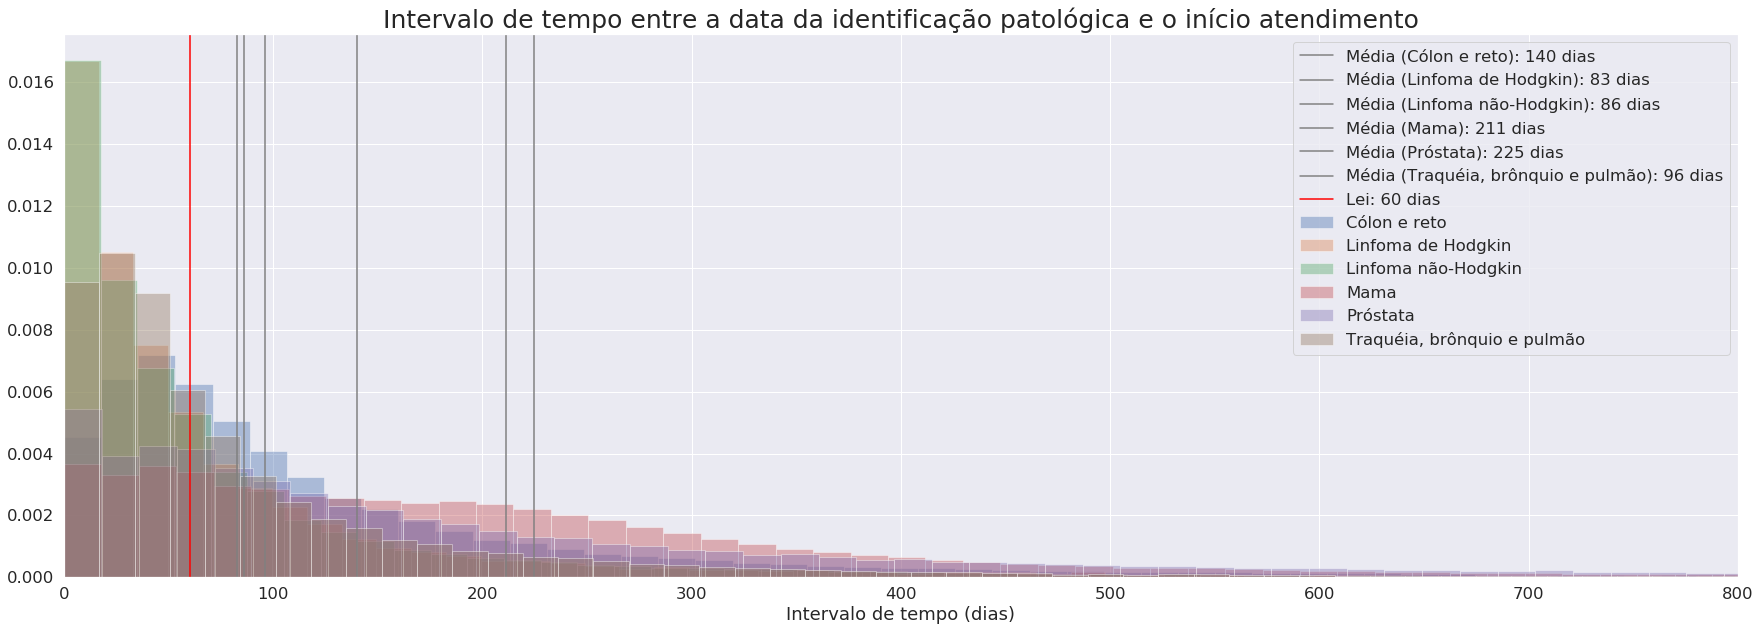

In [12]:
sns.set(font_scale=1.5)
cancers = df1['AP_CIDPRI'].unique()

plt.figure(figsize=(30, 10))
plt.title('Intervalo de tempo entre a data da identificação patológica e o início atendimento', size=25)
for ill in cancers:
    sns.distplot(df1.loc[df1['AP_CIDPRI']==ill]['demora_1_atd'], bins=100, norm_hist=True, kde=False, label=ill)
    plt.axvline(x=df1.loc[df1['AP_CIDPRI']==ill]['demora_1_atd'].mean(), color='grey', label='Média ({0}): {1:.0f} dias'.format(ill, df1.loc[df1['AP_CIDPRI']==ill]['demora_1_atd'].mean()))

plt.axvline(x=60, color='red', label='Lei: 60 dias')
plt.xlabel('Intervalo de tempo (dias)')
plt.xlim(right=800, left=0)
plt.legend()
plt.show()

## Demora no início do tratamento no câncer de mama: diferentes etnias

In [20]:
df['AP_RACACOR'].unique()

array([ 3,  1,  2, 99,  4,  5])

In [32]:
df7 = df.loc[df['AP_CIDPRI']=='Mama'][['AP_CIDPRI', 'AP_CNSPCN', 'demora_1_atd', 'AP_RACACOR']].groupby(['AP_CIDPRI', 'AP_CNSPCN', 'AP_RACACOR']).mean()['demora_1_atd'].reset_index()

df7.loc[df7['AP_RACACOR']==1, 'AP_RACACOR'] = 'Brancos'
df7.loc[df7['AP_RACACOR']==2, 'AP_RACACOR'] = 'Pretos'
df7.loc[df7['AP_RACACOR']==3, 'AP_RACACOR'] = 'Pardos'
df7.loc[df7['AP_RACACOR']==4, 'AP_RACACOR'] = 'Amarelos'
df7.loc[df7['AP_RACACOR']==5, 'AP_RACACOR'] = 'Indígenas'
df7.loc[df7['AP_RACACOR']==99, 'AP_RACACOR'] = 'Sem info'

print(len(df7))
df7.head()

196984


,AP_CIDPRI,AP_CNSPCN,AP_RACACOR,demora_1_atd
0,Mama,|{{|{~||{{{,Brancos,243.666667
1,Mama,|{{|{~}{{{|,Brancos,410.000000
2,Mama,|{{|{|}~{{{,Brancos,119.384615
3,Mama,|{{|{}~~{{{~,Brancos,445.000000
4,Mama,|{{||{~{{{},Pardos,17.000000


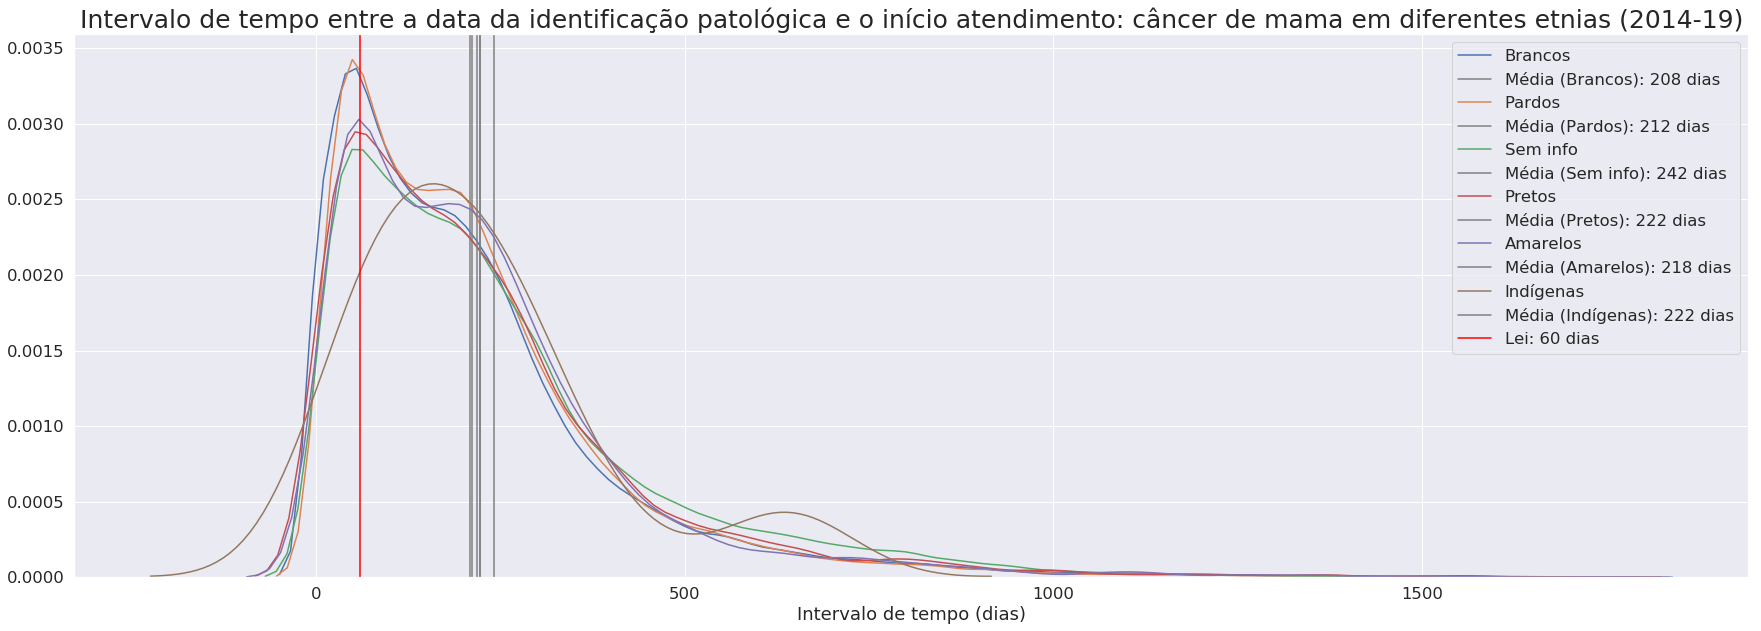

In [53]:
#sns.set(font_scale=1.5)
racas = df7['AP_RACACOR'].unique()

plt.figure(figsize=(30, 10))
plt.title('Intervalo de tempo entre a data da identificação patológica e o início atendimento: câncer de mama em diferentes etnias (2014-19)', size=25)
for raca in racas:
    sns.distplot(df7.loc[df7['AP_RACACOR']==raca]['demora_1_atd'], hist=False, norm_hist=True, kde=True, label=raca)
    plt.axvline(x=df7.loc[df7['AP_RACACOR']==raca]['demora_1_atd'].mean(), color='grey', label='Média ({0}): {1:.0f} dias'.format(raca, df7.loc[df7['AP_RACACOR']==raca]['demora_1_atd'].mean()))

plt.axvline(x=60, color='red', label='Lei: 60 dias')
plt.xlabel('Intervalo de tempo (dias)')
#plt.xlim(right=800, left=0)
plt.legend()
plt.show()

## Comparações gerais entre pacientes com diagnóstico precoce vs tardio

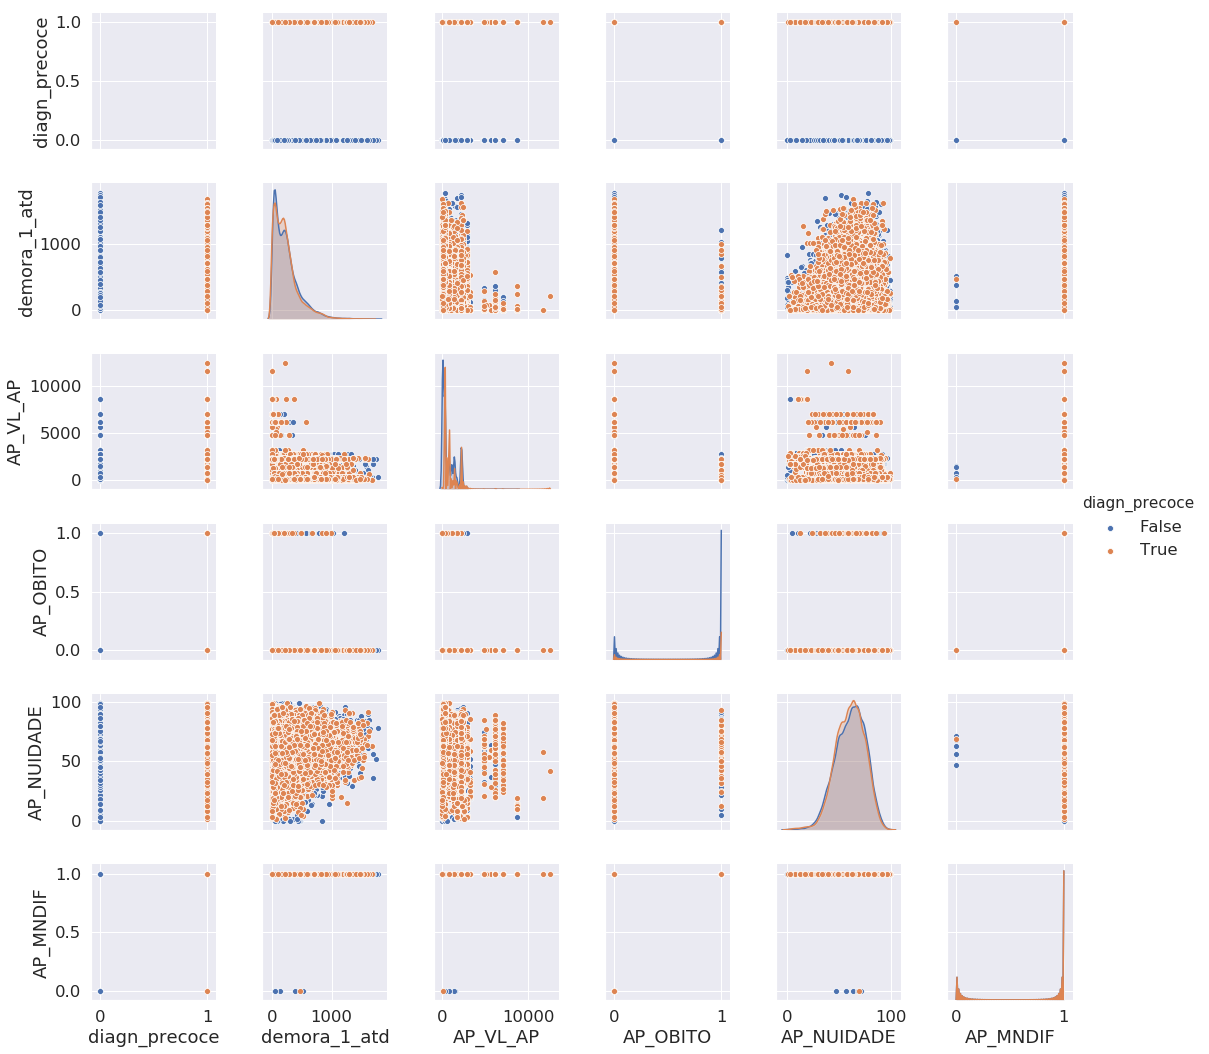

In [38]:
sns.pairplot(df[['diagn_precoce', 'demora_1_atd', 'AP_VL_AP', 'AP_OBITO', 'AP_NUIDADE', 'AP_MNDIF']].sample(frac=0.02), diag_kind='kde', hue='diagn_precoce')
plt.show()

## Correlações

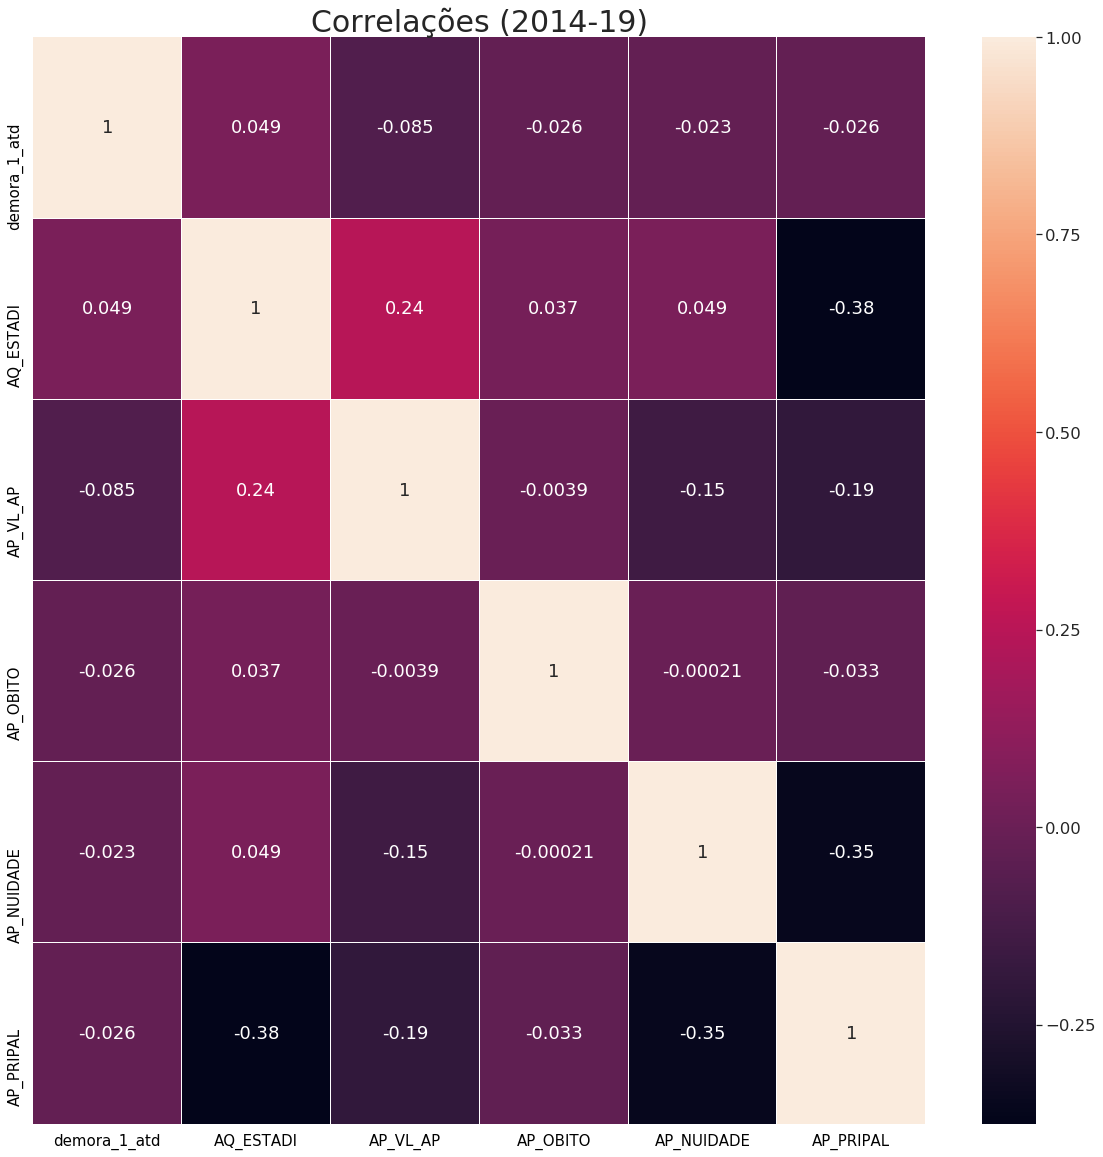

In [93]:
# Avaliação inicial de correlações
plt.figure(figsize=(20, 20))
plt.title('Correlações (2014-19)', size=30)
sns.heatmap(df[['demora_1_atd', 'AQ_ESTADI', 'AP_VL_AP', 'AP_OBITO', 'AP_NUIDADE', 'AP_PRIPAL']].corr(), annot=True, linecolor='white', linewidths=0.1)
plt.xticks(color='black', size=15)
plt.yticks(color='black', size=15)
plt.show()

In [40]:
df4 = df[['AP_CIDPRI', 'AP_CNSPCN', 'AQ_ESTADI']].groupby(['AP_CIDPRI', 'AQ_ESTADI'])['AP_CNSPCN'].nunique().reset_index()
df4

,AP_CIDPRI,AQ_ESTADI,AP_CNSPCN
0,Cólon e reto,0.0,2615
1,Cólon e reto,1.0,2286
2,Cólon e reto,2.0,17570
3,Cólon e reto,3.0,31884
4,Cólon e reto,4.0,24938
5,Linfoma de Hodgkin,0.0,2168
6,Linfoma de Hodgkin,1.0,884
7,Linfoma de Hodgkin,2.0,2534
8,Linfoma de Hodgkin,3.0,2167
9,Linfoma de Hodgkin,4.0,1588


In [41]:
df4.set_index(['AP_CIDPRI', 'AQ_ESTADI']).unstack(1)

AP_CNSPCN                            
AQ_ESTADI                         0.0    1.0    2.0    3.0    4.0
AP_CIDPRI                                                        
Cólon e reto                     2615   2286  17570  31884  24938
Linfoma de Hodgkin               2168    884   2534   2167   1588
Linfoma não-Hodgkin              6564   2920   4009   6061   6266
Mama                             5256  35626  56022  66676  20929
Próstata                         7250   5731  22888  25182  29049
Traquéia, brônquio e pulmão      1253   1307   2147  10297  23805

In [42]:
h = df4.set_index(['AP_CIDPRI', 'AQ_ESTADI']).unstack()
h

AP_CNSPCN                            
AQ_ESTADI                         0.0    1.0    2.0    3.0    4.0
AP_CIDPRI                                                        
Cólon e reto                     2615   2286  17570  31884  24938
Linfoma de Hodgkin               2168    884   2534   2167   1588
Linfoma não-Hodgkin              6564   2920   4009   6061   6266
Mama                             5256  35626  56022  66676  20929
Próstata                         7250   5731  22888  25182  29049
Traquéia, brônquio e pulmão      1253   1307   2147  10297  23805

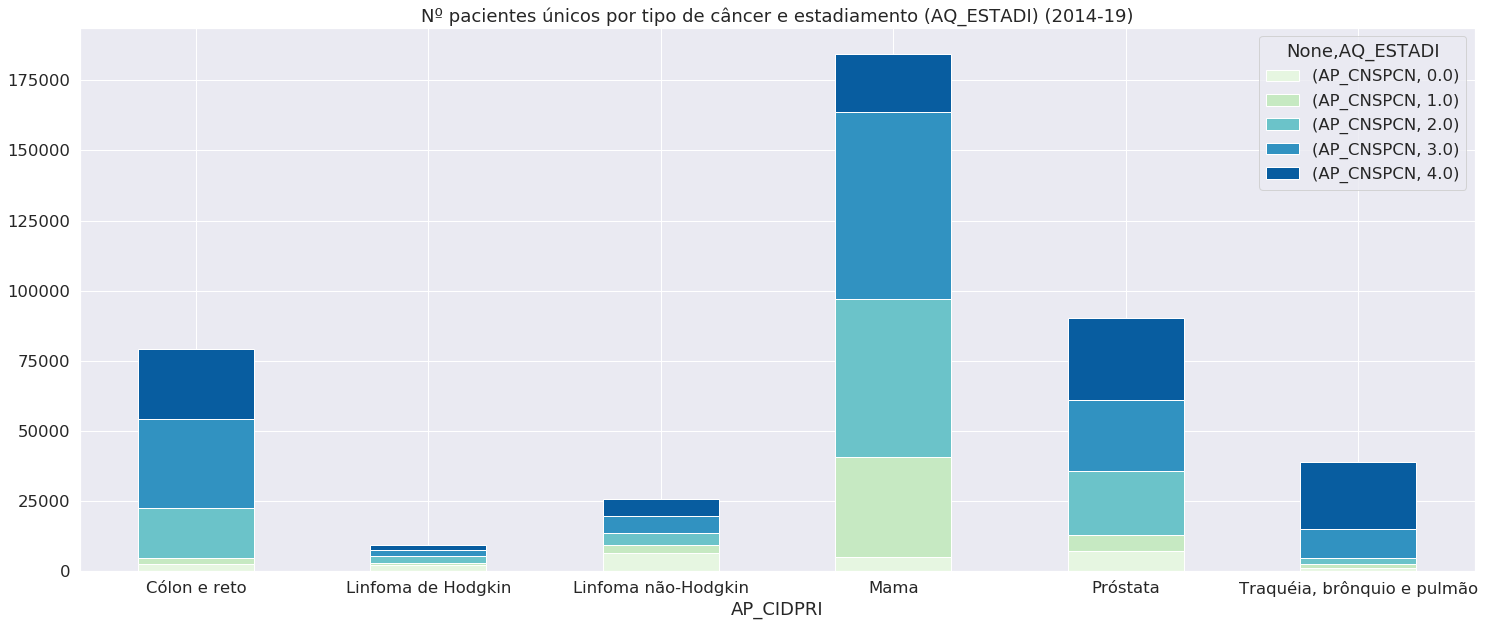

In [52]:
sns.set(font_scale=1.5)
#plt.title('Nº pacientes únicos por tipo de câncer e precocidade do diagnóstico (2014-19)', size=30)
h.plot(kind='bar', 
       title='Nº pacientes únicos por tipo de câncer e estadiamento (AQ_ESTADI) (2014-19)',
       stacked=True, 
       colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
       figsize=(25,10),
       rot=0)